<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction(Netflix)


In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
import plotly.express as px


In [2]:
#loading the dataset
df=pd.read_csv('/content/NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [4]:
#checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# EDA

Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

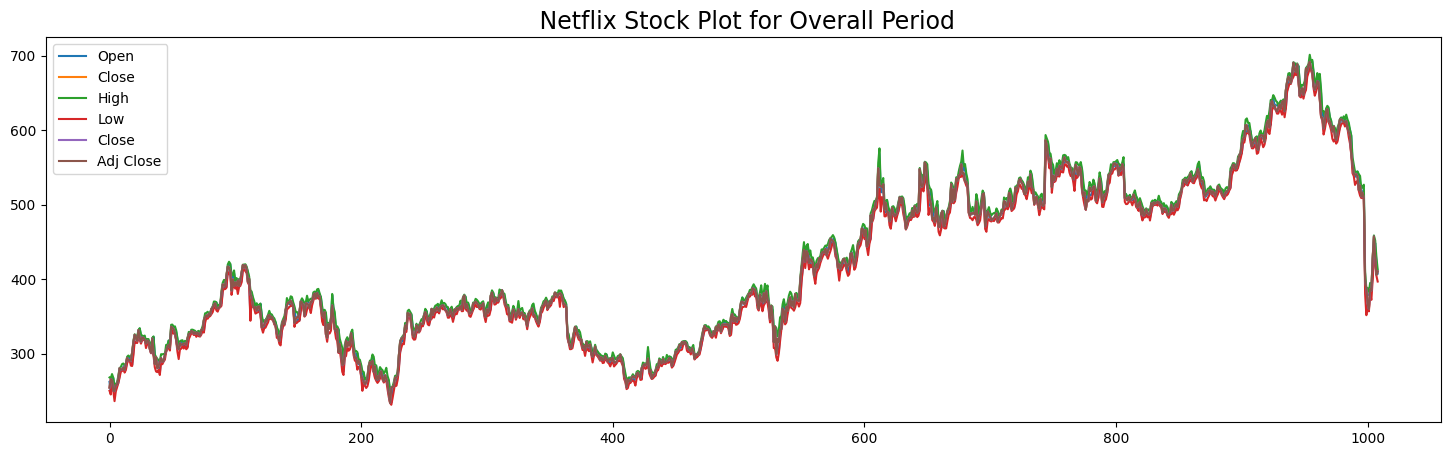

In [5]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

In [6]:
#Graph- Showing the Volume of the stocks traded over the years
fig = px.bar(df, x='Date', y='Volume')
fig.update_layout(title=f'Netflix stock price', barmode='stack', font_color="black")
fig.show()


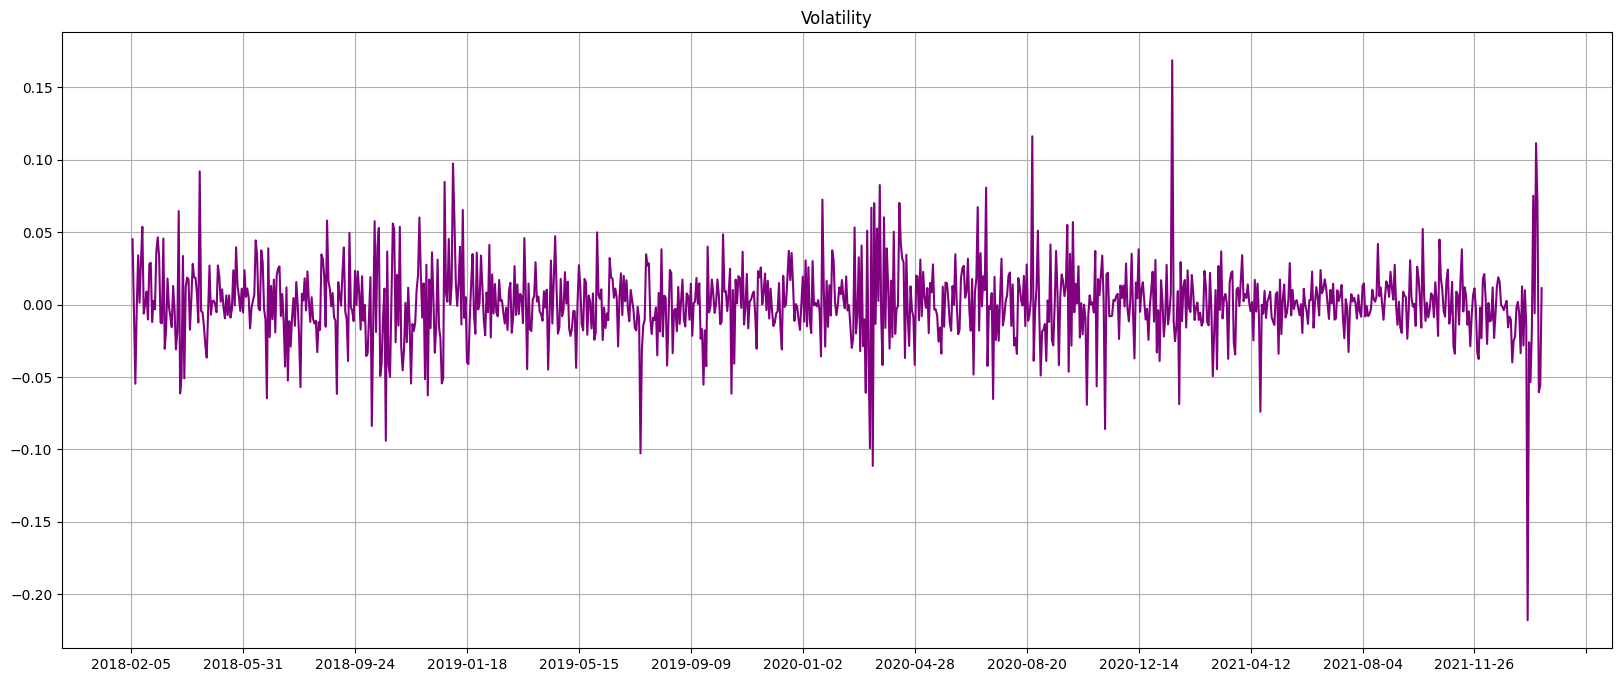

In [7]:
#Graph- Volatility of the stock over the years
df['vol'] = (df['Close']/df['Close'].shift(1)) - 1

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

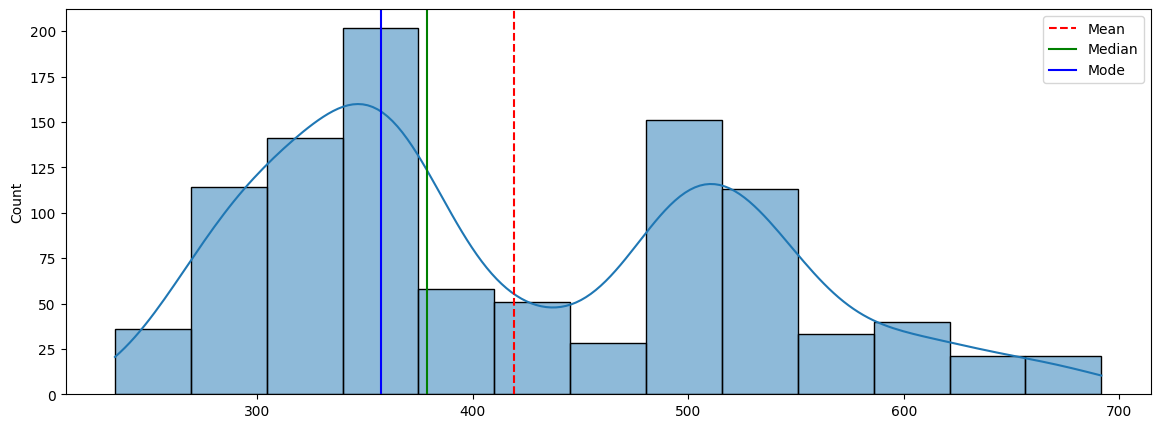

In [8]:
#Graph - Representing the statistical properties of the Close column and the distribution of the data

f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
v_dist_1 = df["Close"].values
sns.histplot(v_dist_1, ax=ax1, kde=True)
mean=df["Close"].mean()
median=df["Close"].median()
mode=df["Close"].mode().values[0]
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

<ipython-input-9-395bb4f7f357>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



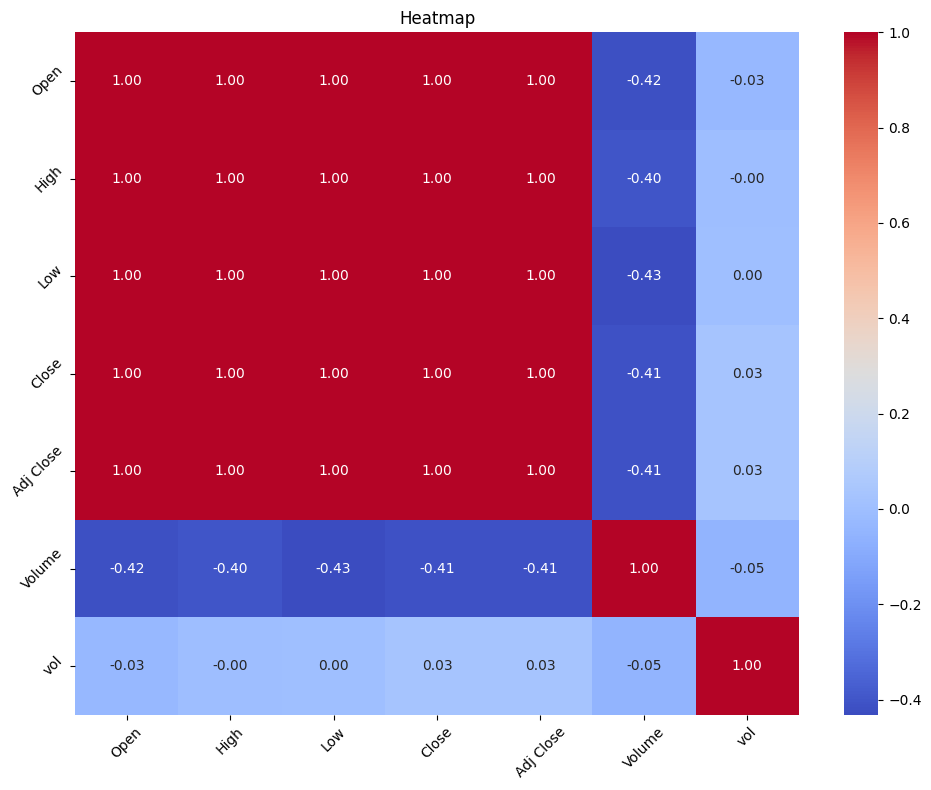

In [9]:
#heatmap - showing the correlation between the attributes
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

1. Risk Management:One of the primary goals is to assess and manage investment risk. By predicting stock prices, investors and portfolio managers can make informed decisions to reduce exposure to potential losses.

In [10]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,vol
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002519


In [11]:
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

In [12]:
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

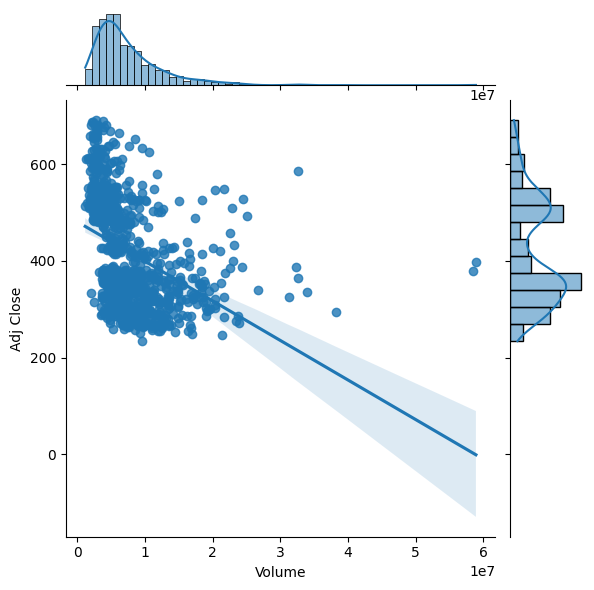

In [13]:
sns.jointplot(x='Volume', y='Adj Close', data=df, kind='reg')

In [14]:
#Splitting into test and training data
X= df[['Open', 'High', 'Low', 'Close', 'Volume']]
y= df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
#Standardization
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Model used : Random Forest

In [16]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[553.97137601 379.24978571 361.31195786 282.40620018 261.1106334
 434.12840093 265.0824694  517.95360648 315.69806911 348.77217258
 520.26088534 321.34475264 489.8786001  298.20136405 510.71931092
 503.11331151 288.72631361 549.49048582 337.49758105 270.21613725
 338.57249553 294.20496034 462.41338583 369.04247224 290.21113387
 502.95015314 498.44456133 297.0068608  351.28284837 363.6167203
 280.9209422  542.83422599 316.88713674 540.81543363 303.79664093
 520.05826545 339.61662634 381.28551173 515.83044348 628.45031635
 482.24322233 297.94551988 305.69776403 264.88771103 515.96472066
 297.15404023 294.31643878 384.10761578 359.67359121 418.47030435
 365.85938115 608.07853329 480.62820511 512.64729849 364.59257334
 419.06538422 375.27641322 360.28349379 370.55831938 361.0713409
 294.90635352 493.30368374 491.94251831 405.99833518 325.16781697
 508.27718568 504.37618136 354.91632678 321.10632151 344.47837739
 656.26341881 351.3631924  263.21120194 267.71782703 427.07612088
 548.08470416

In [17]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.6654
Mean Squared Error: 2.2328
Root Mean Squared Error: 1.4943
(R^2) Score: 0.9998
Train Score : 100.00% and Test Score : 99.98% using Random Tree Regressor.
Accuracy: 99.85 %.


In [18]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

In [19]:
print(predictions)

            Predictions
2022-02-04   553.971376
2022-02-05   379.249786
2022-02-06   361.311958
2022-02-07   282.406200
2022-02-08   261.110633
...                 ...
2022-11-29   546.881825
2022-11-30   410.687537
2022-12-01   278.800790
2022-12-02   406.711621
2022-12-03   328.576020

[303 rows x 1 columns]


Buy Date and Price of Stock
     Unnamed: 0  Predictions
199  2022-08-22   257.361172 

Sell Date and Price of stock
     Unnamed: 0  Predictions
170  2022-07-24   686.288272


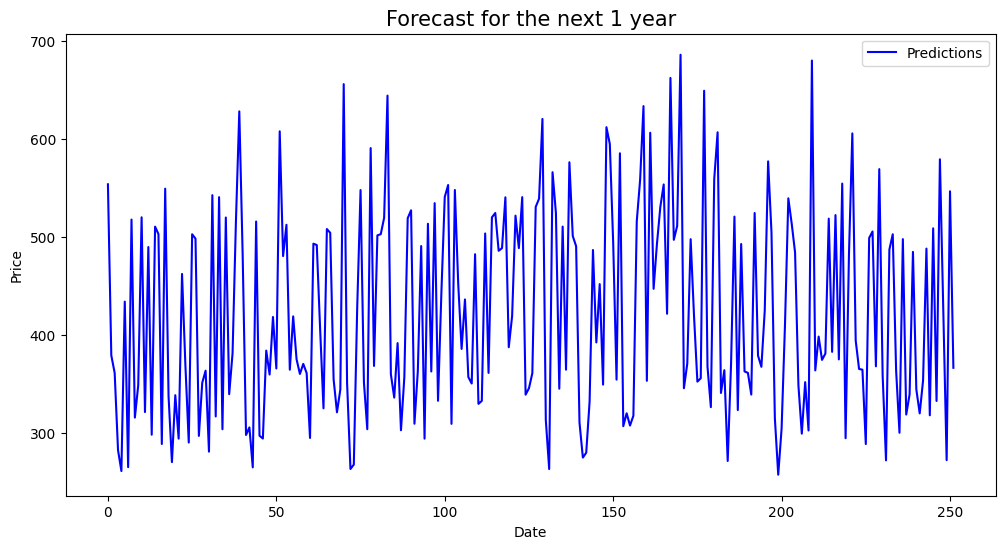

In [20]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(12, 6), color="blue")
plt.title("Forecast for the next 1 year", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
   Unnamed: 0  Predictions
4  2022-02-08   261.110633 

Sell price and date
   Unnamed: 0  Predictions
0  2022-02-04   553.971376


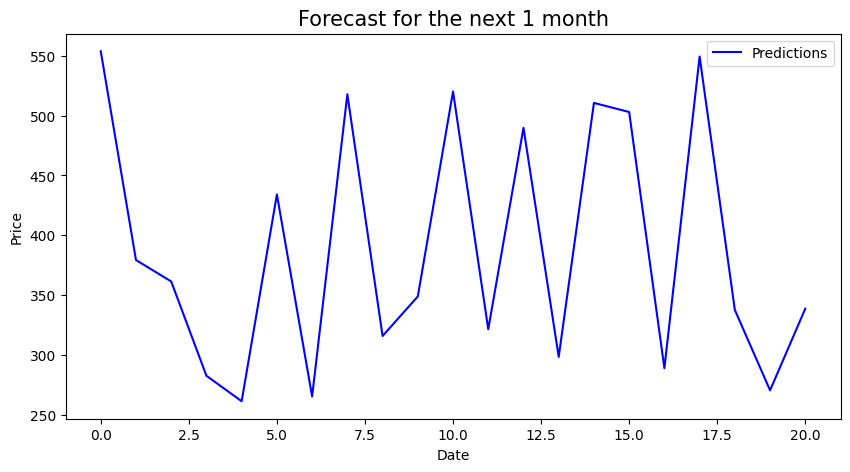

In [21]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 1 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Buy price and date
   Unnamed: 0  Predictions
4  2022-02-08   261.110633 

Sell price and date
   Unnamed: 0  Predictions
0  2022-02-04   553.971376


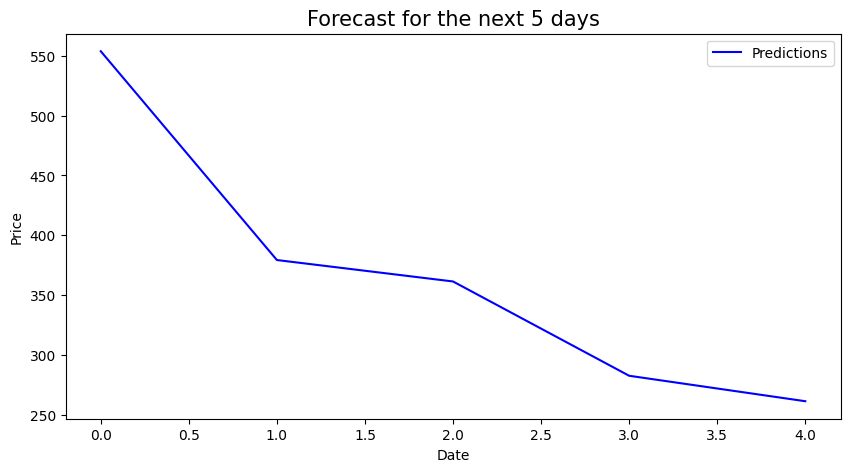

In [22]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy,'\n')
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 5 days",size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

2. Investment Strategy Development:Stock price prediction can be used to develop investment strategies. For example, predicting whether a stock will go up or down in the short term can inform buy or sell decisions.

## **Splitting**

In [23]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
train_data.shape, test_data.shape


((807, 7), (202, 7))

**Preprocessing**

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
scalerr = MinMaxScaler()


In [27]:
train_data_scaled = scaler.fit_transform(train_data)
train_data_scaled

array([[0.17860959, 0.14960206, 0.16969522, ..., 0.17439697, 0.14992077,
        0.5234798 ],
       [0.28898633, 0.26224888, 0.27997145, ..., 0.27364546, 0.10854764,
        0.53068624],
       [0.30501932, 0.28738923, 0.30877797, ..., 0.30631203, 0.06049766,
        0.5821358 ],
       ...,
       [0.67691906, 0.66287127, 0.6698401 , ..., 0.66183209, 0.02491101,
        0.53672916],
       [0.09626332, 0.07914141, 0.10282939, ..., 0.10512013, 0.08610638,
        0.6109781 ],
       [0.33054124, 0.33309287, 0.3316983 , ..., 0.35996755, 0.1189803 ,
        0.60848816]])

In [28]:
test_data_scaled = scaler.transform(test_data)
test_data_scaled

array([[0.57747095, 0.5857591 , 0.59624089, ..., 0.60416715, 0.07499163,
        0.62105537],
       [0.59230423, 0.58091143, 0.56955252, ..., 0.57150058, 0.08023833,
        0.49092378],
       [0.5964488 , 0.59491335, 0.59831441, ..., 0.58493084, 0.05016219,
        0.52855015],
       ...,
       [0.11825144, 0.10166625, 0.09696552, ..., 0.09081345, 0.19982609,
        0.43042588],
       [0.28200602, 0.27101986, 0.29424097, ..., 0.29827134, 0.04948878,
        0.61973354],
       [0.2564841 , 0.23776243, 0.25747474, ..., 0.25381769, 0.14632288,
        0.55237393]])

In [29]:
#Creating a data structure with 50 timesteps and 1 output, timestep is our memory size
#In this function we are creating our train data with 50x stock price and next one is 1 scrolled data.
#for example X_tain[0] will be our data's 0 to 49. values
#X_train[1] will be our data's 1 to 50. values
#this 50 is our memory size, it will remember this way what we had before.
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_data_scaled)):
    X_train.append(train_data_scaled[i-timesteps:i,0])
    y_train.append(train_data_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [30]:
real_stock_price=test_data.loc[:,["Open"]].values


**MODEL(Recurrent Neural Network (RNN))**




In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

# Assuming you have your data prepared and loaded, and X_train, y_train are your input and target sequences

# Initialize the Sequential model
regressor = Sequential()

# Adding the first RNN Layer and some Dropout Regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))  # Note: the correct syntax for dropout rate is 0.2, not 0,2

# Adding the second RNN Layer and some Dropout Regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third RNN Layer and some Dropout Regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth RNN Layer and some Dropout Regularization
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fifth RNN Layer and some Dropout Regularization
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

# Adding the output Layer
regressor.add(Dense(units=1))

# Display the model summary
regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50, 50)            5

In [32]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [33]:
#Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
24/24 [==============================] - 6s 60ms/step - loss: 0.5501
Epoch 2/50
24/24 [==============================] - 2s 90ms/step - loss: 0.4204
Epoch 3/50
24/24 [==============================] - 2s 85ms/step - loss: 0.3308
Epoch 4/50
24/24 [==============================] - 1s 59ms/step - loss: 0.3204
Epoch 5/50
24/24 [==============================] - 1s 60ms/step - loss: 0.2780
Epoch 6/50
24/24 [==============================] - 1s 59ms/step - loss: 0.2386
Epoch 7/50
24/24 [==============================] - 2s 64ms/step - loss: 0.2050
Epoch 8/50
24/24 [==============================] - 2s 63ms/step - loss: 0.1975
Epoch 9/50
24/24 [==============================] - 1s 60ms/step - loss: 0.2015
Epoch 10/50
24/24 [==============================] - 2s 85ms/step - loss: 0.1904
Epoch 11/50
24/24 [==============================] - 2s 88ms/step - loss: 0.1715
Epoch 12/50
24/24 [==============================] - 1s 61ms/step - loss: 0.1694
Epoch 13/50
24/24 [==================

In [34]:
dataset_total=pd.concat((train_data["Open"],test_data["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(train_data)-timesteps:].values.reshape(-1,1)
inputs=scalerr.fit_transform(inputs)

In [35]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_data_scaled)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

7/7 [==============================] - 1s 28ms/step


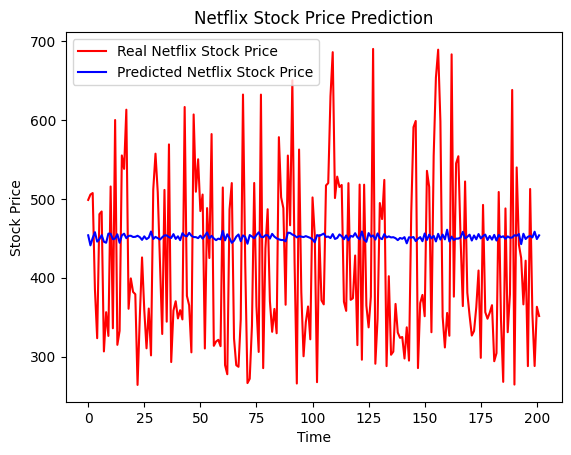

3. Portfolio Optimization:Stock price prediction can help optimize investment portfolios. By predicting future returns and risks associated with different assets, investors can allocate their capital more efficiently to maximize returns or achieve specific objectives, such as minimizing risk.


In [ ]:
#creating a new data frame to store the required columns
new_data=df.drop(['Adj Close', 'High', 'Low', 'Open', 'Volume'],axis=1)
new_data.head()

,Close,vol
Date,,
2018-02-05,254.259995,NaN
2018-02-06,265.720001,0.045072
2018-02-07,264.559998,-0.004366
2018-02-08,250.100006,-0.054657
2018-02-09,249.470001,-0.002519


In [ ]:
#Grouping and finding the sum of Close price by date and converting date to datetime format
new_data = new_data.groupby('Date')['Close'].sum().reset_index()
new_data.Date=pd.to_datetime(new_data.Date)
new_data

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
#Setting the date as an index for the df
new_data.set_index(['Date'],inplace=True)
new_data.head()

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


In [ ]:
#Checking for stationarity using Augmented Dickey Fuller Test
result = adfuller(new_data['Close'])
p_value = result[1]
if p_value <= 0.05:
    print('The series is likely stationary as the p value({0}) is <= than 0.05'.format(p_value))
else:
    print('The series is likely non-stationary as the p_value({0}) is > 0.05'.format(p_value))

The series is likely non-stationary as the p_value(0.3742289256820759) is > 0.05


In [ ]:
#Differencing the data to make it stationary
diff = new_data['Close'] - new_data['Close'].shift(1)
diff = diff.dropna()

#Checking for stationarity using Augmented Dickey Fuller Test again but on the diff_values
result = adfuller(diff)
p_value = result[1]
if p_value <= 0.05:
    print('The series is like stationary as the p value({0}) is <= than 0.05'.format(p_value))
else:
    print('The series is likely non-stationary as the p_value({0}) is > 0.05'.format(p_value))

The series is like stationary as the p value(1.5304022754298515e-26) is <= than 0.05


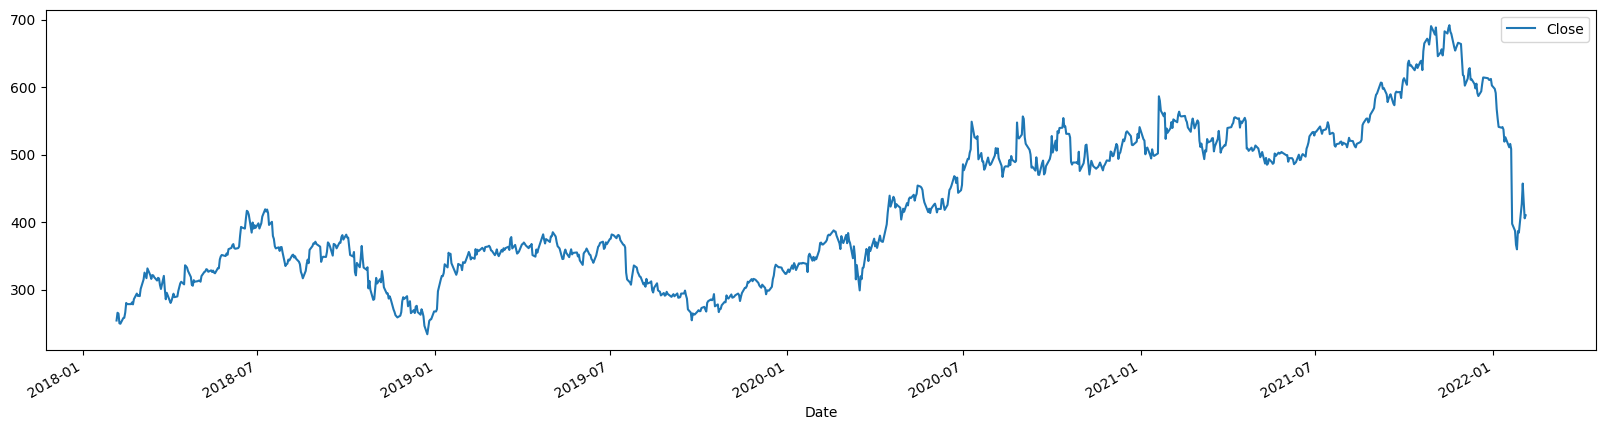

In [ ]:
#Graph- Close Price and date(Before differencing)
new_data.plot(figsize=(20,5))
plt.show()


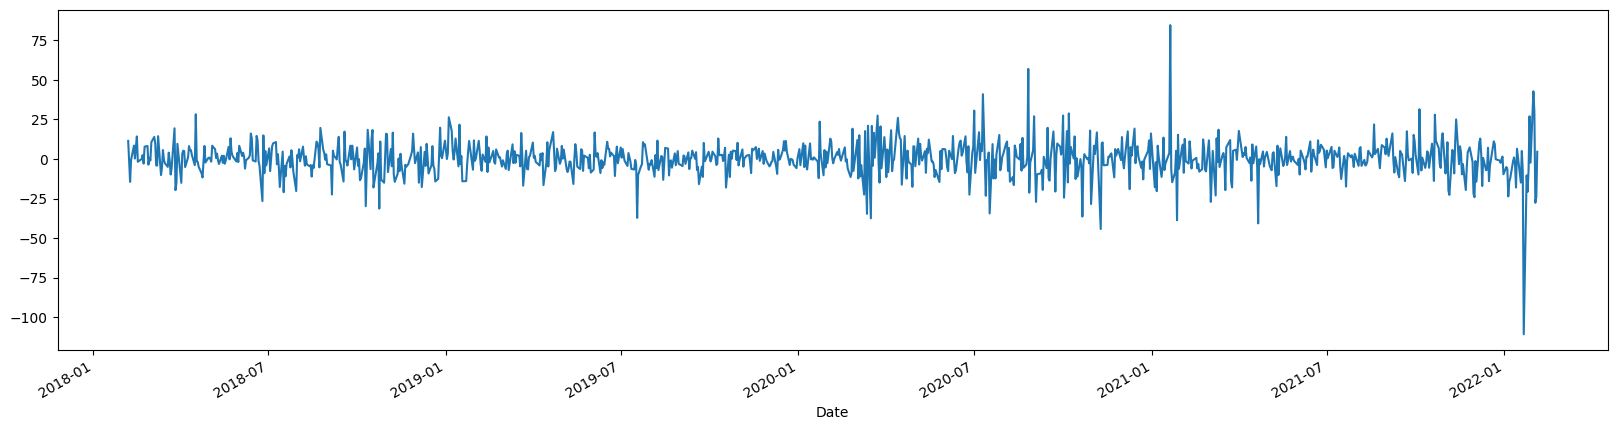

In [ ]:
#Graph- Close Price and date(After  differencing)
diff.plot(figsize=(20,5))
plt.show()

<Figure size 800x500 with 0 Axes>

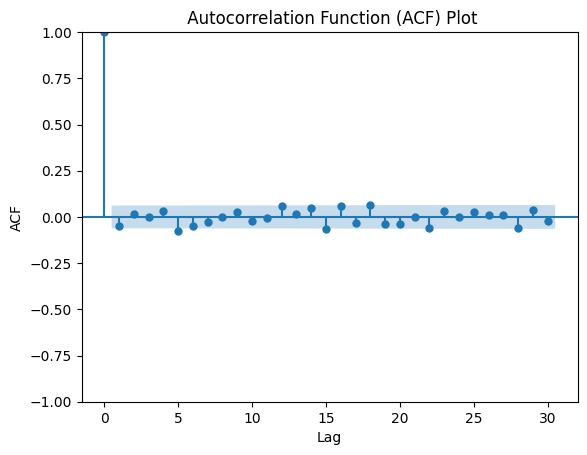

In [ ]:
#Plotting Autocorrelation and Partial Autocorreltion functions to find the number of lags
#ACF plot
plt.figure(figsize=(8, 5))
plot_acf(diff, lags=30)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title(' Autocorrelation Function (ACF) Plot')
plt.show()

 Number of lags is 7

<Figure size 800x500 with 0 Axes>

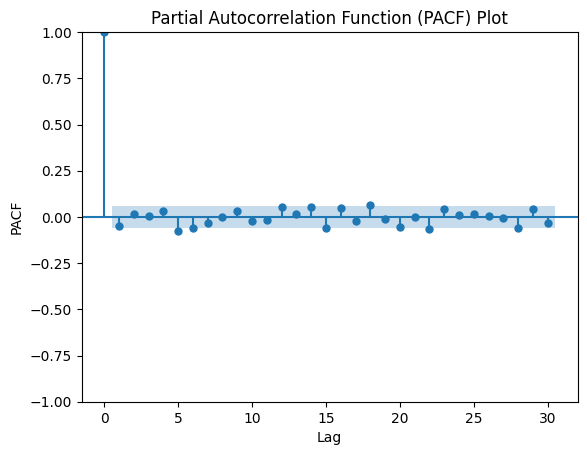

In [ ]:
#PACF plot
plt.figure(figsize=(8, 5))
plot_pacf(diff, lags=30)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

 Number of lags is 7

In [ ]:
#Building the model and finding the optimial p and q values
warnings.filterwarnings("ignore")
for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(new_data['Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ")


AIC :7719.252725378626, Order Of AR: 1, Order of MA:1 
AIC :7720.890983924168, Order Of AR: 1, Order of MA:2 
AIC :7722.748629701169, Order Of AR: 1, Order of MA:3 
AIC :7723.68576188463, Order Of AR: 1, Order of MA:4 
AIC :7718.415482131526, Order Of AR: 1, Order of MA:5 
AIC :7718.172317914759, Order Of AR: 1, Order of MA:6 
AIC :7719.876850429353, Order Of AR: 2, Order of MA:1 
AIC :7723.251351789884, Order Of AR: 2, Order of MA:2 
AIC :7724.6740173066555, Order Of AR: 2, Order of MA:3 
AIC :7723.762865540199, Order Of AR: 2, Order of MA:4 
AIC :7718.287566398099, Order Of AR: 2, Order of MA:5 
AIC :7720.069487586208, Order Of AR: 2, Order of MA:6 
AIC :7721.431344434819, Order Of AR: 3, Order of MA:1 
AIC :7714.7389103751475, Order Of AR: 3, Order of MA:2 
AIC :7725.176500010285, Order Of AR: 3, Order of MA:3 
AIC :7720.359601613189, Order Of AR: 3, Order of MA:4 
AIC :7719.970658334276, Order Of AR: 3, Order of MA:5 
AIC :7722.088940674155, Order Of AR: 3, Order of MA:6 
AIC :7723

In [ ]:
#using the optimal order of p and q values to build the model
#ARIMA
model=ARIMA(new_data['Close'],order=(6,1,6))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1009
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3838.361
Date:                Mon, 09 Oct 2023   AIC                           7702.723
Time:                        00:55:50   BIC                           7766.627
Sample:                             0   HQIC                          7727.002
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2226      0.065      3.445      0.001       0.096       0.349
ar.L2          0.6265      0.062     10.131      0.000       0.505       0.748
ar.L3         -1.1327      0.069    -16.518      0.000      -1.267      -0.998
ar.L4          0.5390      0.062      8.658      0.000       0.417       0.661
ar.L5          0.2455      0.056      4.348      0.000       0.135       0.356
ar.L6         -0.8749      0.065    -13.535      0.000      -1.002      -0.748
ma.L1         -0.2625      0.074     -3.540      0.000      -0.408      -0.117
ma.L2         -0.5879      0.068     -8.668      0.000      -0.721      -0.455
ma.L3          1.1596      0.071     16.444      0.000       1.021       1.298
ma.L4         -0.5766      0.065     -8.882      0.000      -0.704      -0.449
ma.L5         -0.2654      0.065     -4.060      0.000      -0.394      -0.137
ma.L6          0.8397      0.073     11.528      0.000       0.697       0.982
sigma2       120.4552      2.382     50.562      0.000     115.786     125.125
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              9330.40
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

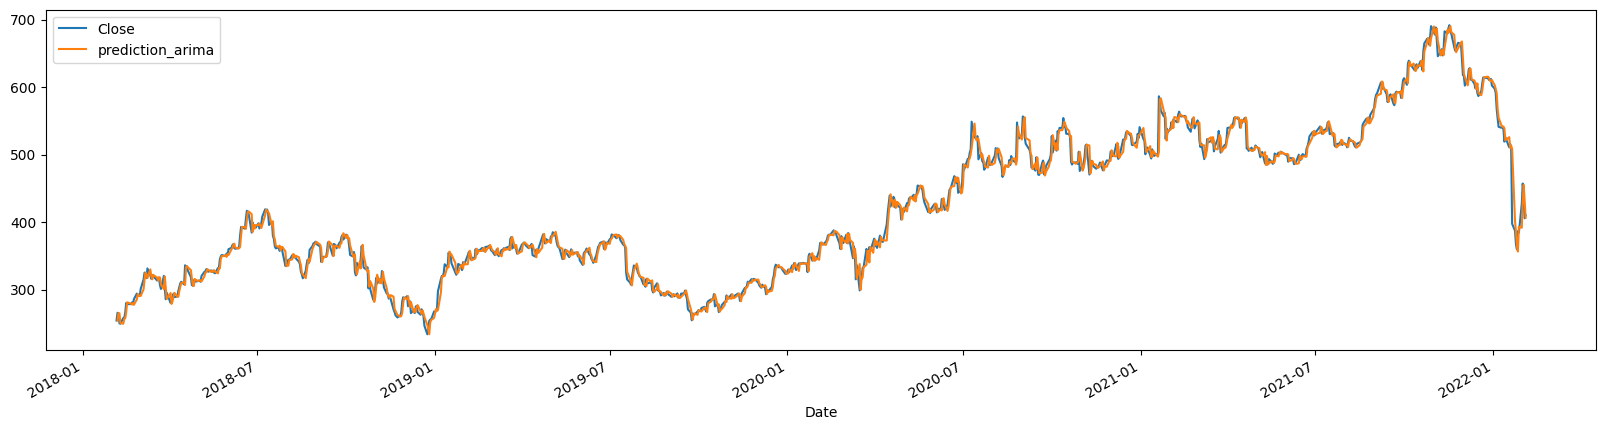

In [ ]:
#Graph -Close prices and Predicted Close Prices
new_data['prediction_arima']=result.predict(start=1)
new_data[["Close","prediction_arima"]].plot(figsize=(20,5))

In [ ]:
new_data=new_data.dropna()

In [ ]:
#Model evaluation
actual_values = new_data['Close']
predicted_values = new_data['prediction_arima']

#mean_absolute_error
mae = metrics.mean_absolute_error(actual_values, predicted_values)
#mean_squared_error
mse = metrics.mean_squared_error(actual_values, predicted_values)
#Root mean squared error
rmse = np.sqrt(mse)
#r_squared(r2)
r_squared = metrics.r2_score(actual_values, predicted_values)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Accuracy Percentage (R-squared): {r_squared}")

Mean Absolute Error (MAE): 7.497309946578857
Mean Squared Error (MSE): 118.81517476602137
Root Mean Squared Error (RMSE): 10.900237372003481
Accuracy Percentage (R-squared): 0.9898446598313851


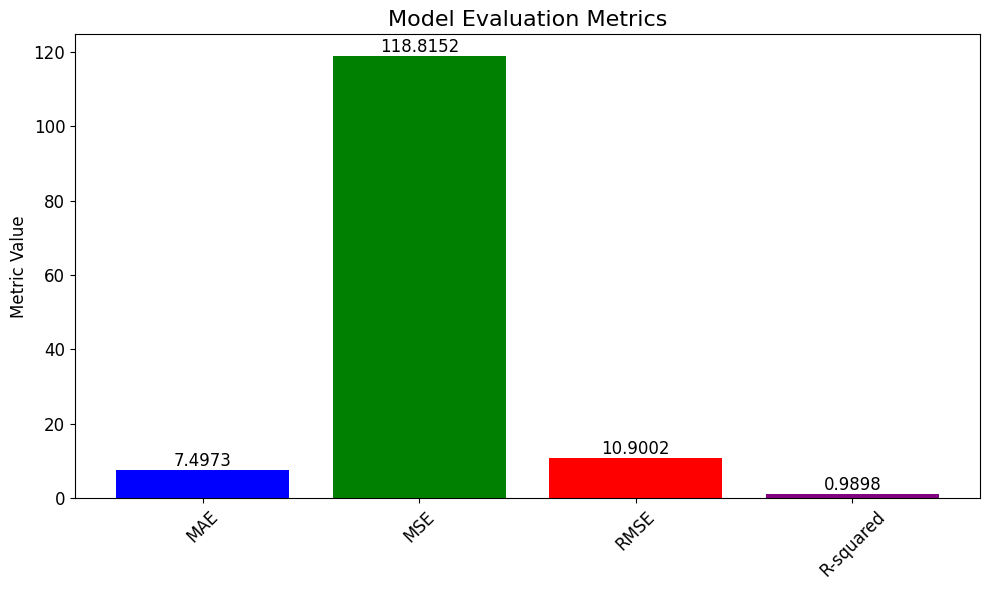

In [ ]:
#Graph-visual representation of the metrics
metrics_names = ['MAE', 'MSE', 'RMSE', 'R-squared']
metrics_values = [mae, mse, rmse, r_squared]


plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Evaluation Metrics', fontsize=16)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(metrics_values):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Forecasting the price
price_forecast = result.forecast(30, alpha=0.05)
forecast_values = [round(value, 0) for value in price_forecast]

#creating date range between 1st Feb 2022 and 2nd March 2022(30 days)
start_date = '2022-02-01'
end_date = '2022-03-02'
date_range = pd.date_range(start=start_date, end=end_date)

price_forecast_date_range=pd.Series(forecast_values,index=date_range)

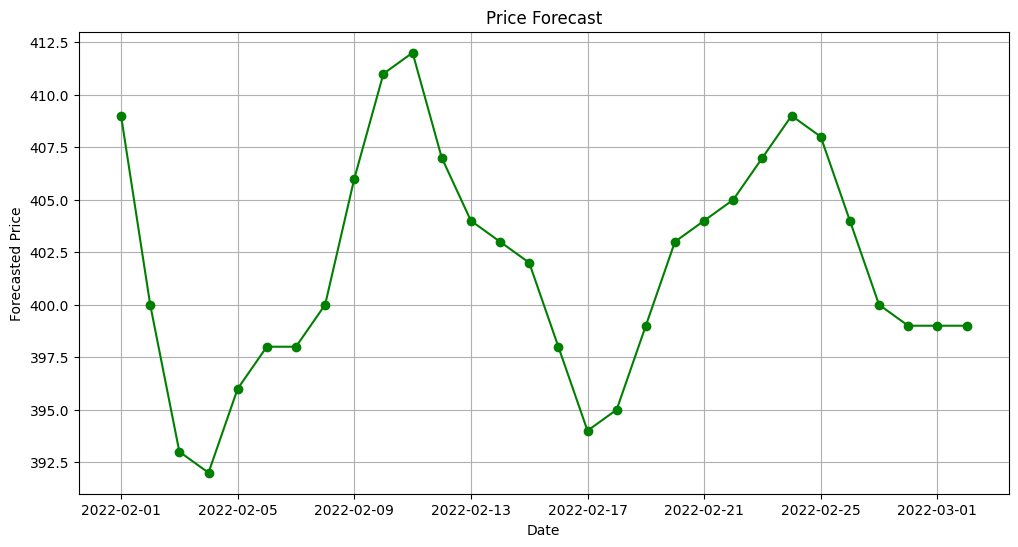

In [ ]:
#Graph- Forecasted Price and Date
plt.figure(figsize=(12, 6))
plt.plot(price_forecast_date_range.index, price_forecast_date_range.values, marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Forecasted Price')
plt.title('Price Forecast')
plt.grid(True)

# Show the plot
plt.show()

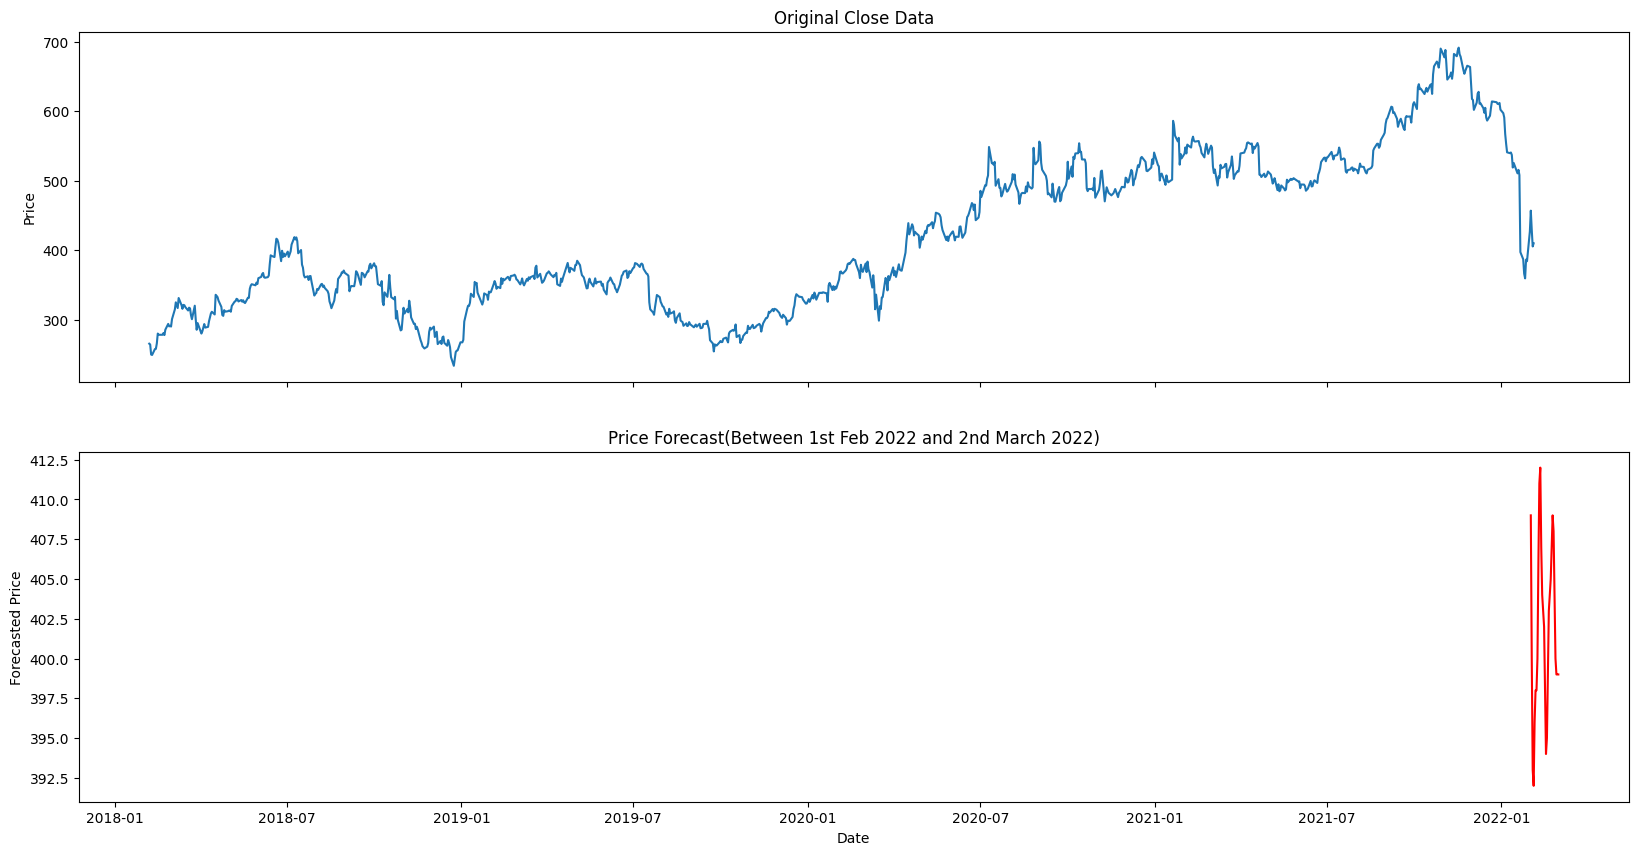

In [ ]:
#Graph - Close price and Date(between 01 Jan 2018 - 01 Jan 2022 and 01 Feb 2022 - 02 March 2022)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
ax1.plot(new_data["Close"])
ax1.set_ylabel('Price')
ax1.set_title('Original Close Data')

ax2.plot(price_forecast_date_range, color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Forecasted Price')
ax2.set_title('Price Forecast(Between 1st Feb 2022 and 2nd March 2022)')
plt.show()